In [1]:
import pandas as pd 
import numpy as np 

In [1]:
import pandas as pd

# Read the CSV file using the 'python' engine to handle the complex formatting
df_train = pd.read_csv('./semeval/semeval-2013-train.csv', delimiter='\t')
df_val = pd.read_csv('./semeval/semeval-2013-dev.csv', delimiter='\t')
df_test = pd.read_csv('./semeval/semeval-2013-test.csv', delimiter='\t')

# Display the dataframe
print(df_train.head())


   label                                               text
0      0  Today's news: Democrats offer Republicans ever...
1      0  @stanscates I would use that in ads from now u...
2      0  Microsoft issues critical patch for Windows 7,...
3      0  will testdrive the new Nokia N9 phone with our...
4     -1  no way to underestimate the madness and cynici...


In [2]:
df_train['text'][0]

"Today's news: Democrats offer Republicans everything they asked for; Republicans demand more. Not hard to understand: R's want a shutdown."

In [3]:
import pandas as pd
import re
import spacy
from tqdm import tqdm

# Load the small English model from spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    """
    Preprocess the input text by cleaning and removing unnecessary components.

    Args:
        text (str): Raw review text.

    Returns:
        str: Cleaned text.
    """
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text

def tokenize_text(text):
    """
    Tokenize and lemmatize the preprocessed text using spaCy.

    Args:
        text (str): Cleaned text.

    Returns:
        list: List of tokens.
    """
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha  # Filter non-alphabetic tokens
    ]
    return tokens

def preprocess_dataframe(df, text_column='text'):
   
    # Preprocess text
    tqdm.pandas(desc="Preprocessing text")
    df['cleaned_review'] = df[text_column].progress_apply(preprocess_text)

    # Tokenize text
    tqdm.pandas(desc="Tokenizing text")
    df['tokenized_review'] = df['cleaned_review'].progress_apply(tokenize_text)

    return df

def save_dataframe(df, filepath):
   
    df.to_csv(filepath, index=False)
    print(f"Data saved to {filepath}")

# Apply the preprocessing and tokenization
df_train = preprocess_dataframe(df_train)
df_val = preprocess_dataframe(df_val)
df_test = preprocess_dataframe(df_test)

# Save the processed dataframes
save_dataframe(df_train, 'semeval-2013-train-tokenized.csv')
save_dataframe(df_val, 'semeval-2013-dev-tokenized.csv')
save_dataframe(df_test, 'semeval-2013-test-tokenized.csv')


c:\Users\Pranav\anaconda3\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Pranav\anaconda3\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Pranav\anaconda3\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
Tokenizing text: 100%|██████████| 3545/3545 [00:20<00:00, 176.60it/s]


Data saved to semeval-2013-train-tokenized.csv
Data saved to semeval-2013-dev-tokenized.csv
Data saved to semeval-2013-test-tokenized.csv


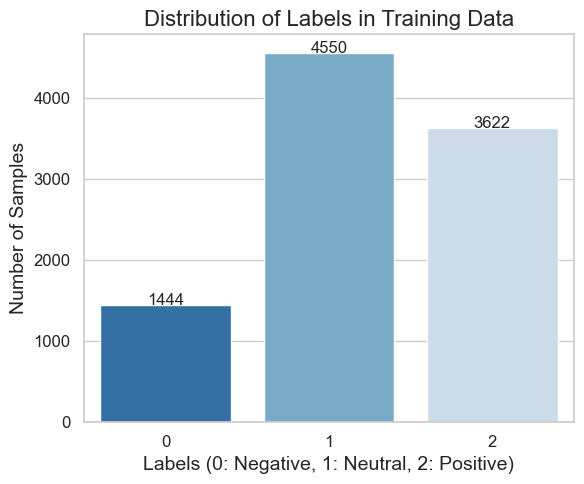

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the labels have been shifted, let's calculate the label distribution.
label_counts = train_data['label'].value_counts().sort_index()

# Set up the plot style using seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(6, 5))

# Plot the label distribution using seaborn's barplot
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_r")

# Add annotations (text labels) above each bar
for i, count in enumerate(label_counts.values):
    ax.text(i, count + 0.5, f'{count}', ha='center', fontsize=12)

# Customize the plot's appearance
plt.xlabel('Labels (0: Negative, 1: Neutral, 2: Positive)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Labels in Training Data', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


['PAD', 'UNK', 'aap', 'aaron', 'able', 'academy', 'accord', 'account', 'ace', 'act', 'action', 'actor', 'actually', 'adam', 'add', 'afc', 'africa', 'afternoon', 'age', 'agent']
Vocabulary size: 1502
Total words: 97351


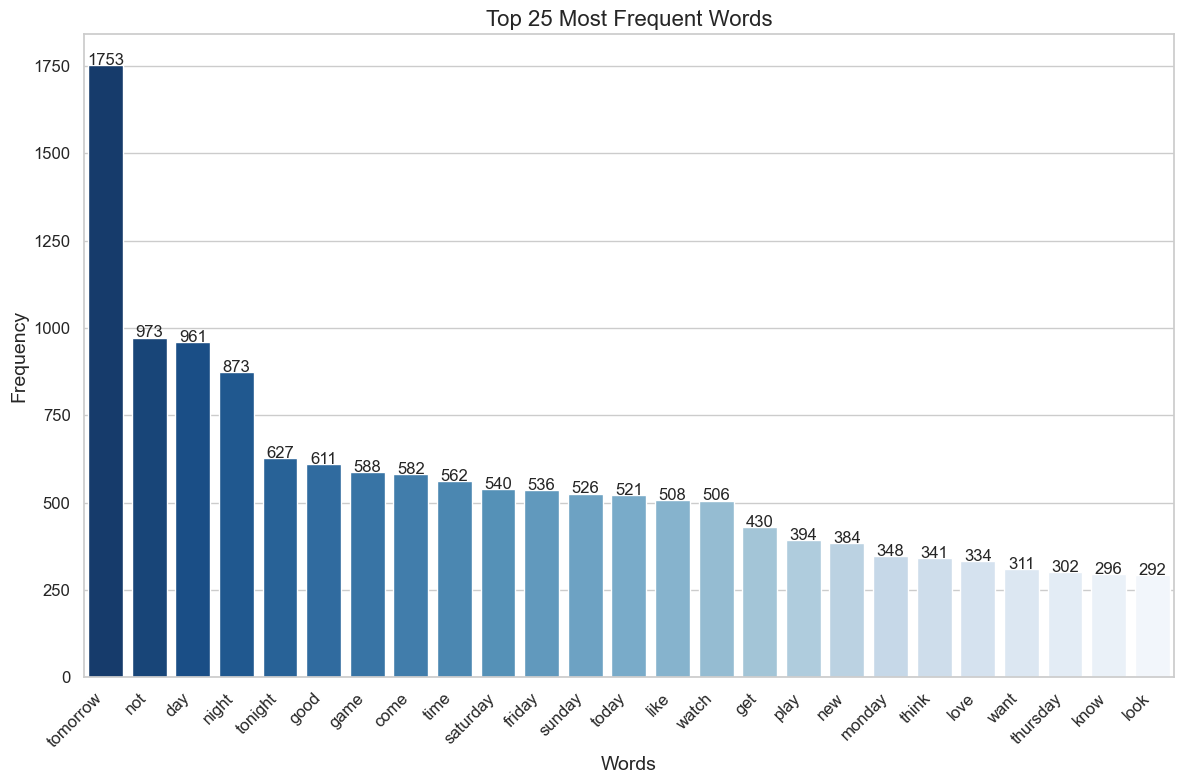

Vocabulary size: 1502
Train indices shape: 9616
Test indices shape: 3545
Dev indices shape: 1650
Average sentence length: 11 tokens
The labels have been updated to start from 0.
Unique labels: [1 0 2]


In [15]:
# Load preprocessed data
import pandas as pd
from collections import Counter
import ast  # To safely evaluate strings containing Python literals
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv('semeval-2013-train-tokenized.csv')
test_data = pd.read_csv('semeval-2013-test-tokenized.csv')
dev_data = pd.read_csv('semeval-2013-dev-tokenized.csv')


max_vocab_size = 1500
min_freq = 5


def build_vocab(tokenized_reviews, min_freq=10, max_vocab_size=25000):
    counter = Counter()

    # Update counter with tokens from reviews
    for review in tokenized_reviews:
        tokens = ast.literal_eval(review)
        
        # Remove tokens that are 1-2 characters long and unwanted tokens like 'nt', 's'
        tokens = [token for token in tokens if len(token) > 2]
        
        counter.update(tokens)
    
    # Filter by min_freq and get the most common words up to max_vocab_size
    vocab = [word for word, freq in counter.most_common(max_vocab_size) if freq >= min_freq]
    
    vocab = sorted(vocab)
    
    # Add special tokens
    vocab = ['PAD', 'UNK'] + vocab

    # Create mappings
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}
    
    print(vocab[:20])  # Print first 20 words
    print(f"Vocabulary size: {len(vocab)}")

    return word_to_idx, idx_to_word, counter

word_to_idx, idx_to_word, word_counts = build_vocab(train_data['tokenized_review'], min_freq=min_freq, max_vocab_size=max_vocab_size)




def plot_word_count(word_counts, top_n=30):
    """
    Plot the top N most frequent words in the dataset.

    Args:
        word_counts (Counter): Word frequencies from the tokenized reviews.
        top_n (int): Number of top words to display in the graph.
    """
    # Get the top N most common words
    most_common = word_counts.most_common(top_n)
    
    # Unpack the words and counts for plotting
    words, counts = zip(*most_common)
    
    # Set up the plot style using seaborn
    sns.set(style="whitegrid")

    # Create a figure and axis with larger size
    plt.figure(figsize=(12, 8))

    # Plot using seaborn's barplot for better aesthetics
    ax = sns.barplot(x=list(words), y=list(counts), palette='Blues_r')

    # Add annotations (text labels) above each bar
    for i, count in enumerate(counts):
        ax.text(i, count + 0.5, f'{count}', ha='center', fontsize=12)

    # Customize the plot's appearance
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Top {top_n} Most Frequent Words', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    # Show the plot with better margins
    plt.tight_layout()
    plt.show()


# Display word count and plot top words
print(f"Total words: {sum(word_counts.values())}")
plot_word_count(word_counts, top_n=25)

# %% Print vocab size
vocab_size = len(word_to_idx)
print(f"Vocabulary size: {vocab_size}")

# %% Convert tokenized text to indices
def tokens_to_indices(tokenized_reviews, word_to_idx):
    indices = []
    for review in tokenized_reviews:
        tokens = ast.literal_eval(review)
        idx = [word_to_idx.get(token, word_to_idx['UNK']) for token in tokens]
        indices.append(idx)
    return indices

train_indices = tokens_to_indices(train_data['tokenized_review'], word_to_idx)
test_indices = tokens_to_indices(test_data['tokenized_review'], word_to_idx)
dev_indices = tokens_to_indices(dev_data['tokenized_review'], word_to_idx)

print(f"Train indices shape: {len(train_indices)}")
print(f"Test indices shape: {len(test_indices)}")
print(f"Dev indices shape: {len(dev_indices)}")

# %% Calculate average sentence length
def calculate_average_length(indices):
    total_words = sum(len(seq) for seq in indices)
    total_sentences = len(indices)
    average_length = total_words / total_sentences
    return int(round(average_length))

average_length = calculate_average_length(train_indices)
print(f"Average sentence length: {average_length} tokens")

# %% Pad or truncate sequences to a fixed length
max_length = average_length  # e.g., 60
pad_idx = word_to_idx['PAD']

def pad_truncate(indices, max_length, pad_idx):
    padded = []
    for seq in indices:
        if len(seq) > max_length:
            padded_seq = seq[:max_length]
        else:
            padded_seq = seq + [pad_idx] * (max_length - len(seq))
        padded.append(padded_seq)
    return padded

train_padded = pad_truncate(train_indices, max_length, pad_idx)
test_padded = pad_truncate(test_indices, max_length, pad_idx)
dev_padded = pad_truncate(dev_indices, max_length, pad_idx)

# %% Save the padded reviews to the DataFrame and export as CSV
train_data['padded_review'] = train_padded
test_data['padded_review'] = test_padded
dev_data['padded_review'] = dev_padded

train_data['label'] = train_data['label'] + 1
test_data['label'] = test_data['label'] + 1
dev_data['label'] = dev_data['label'] + 1
print("The labels have been updated to start from 0.")
# Print the unique labels in the dataset. 
print(f"Unique labels: {train_data['label'].unique()}")

# Save the updated DataFrame if needed
train_data.to_csv("train_data_final_2.csv", index=False)
test_data.to_csv("test_data_final_2.csv", index=False)
dev_data.to_csv("dev_data_final_2.csv", index=False)


In [17]:
# Print tokenized review and label for some examples
for i in range(4):
    print(f"Example {i + 1}:")
    print("Tokenized review:")
    print(train_data['tokenized_review'][i])
    print("\nLabel:")
    print(train_data['label'][i])
    print("\n" + "-"*50 + "\n")



Example 1:
Tokenized review:
['today', 'news', 'democrats', 'offer', 'republicans', 'ask', 'republicans', 'demand', 'hard', 'understand', 'r', 'want', 'shutdown']

Label:
1

--------------------------------------------------

Example 2:
Tokenized review:
['stanscate', 'use', 'ad', 'october', 'st', 'republicans', 'politic', 'country']

Label:
1

--------------------------------------------------

Example 3:
Tokenized review:
['microsoft', 'issue', 'critical', 'patch', 'windows', 'vista', 'user', 'microsoft', 'issue', 'light', 'patch', 'tuesday', 'httpcnetcoqlgolp']

Label:
1

--------------------------------------------------

Example 4:
Tokenized review:
['testdrive', 'new', 'nokia', 'n', 'phone', 'new', 'app', 'start', 'thursday']

Label:
1

--------------------------------------------------

